# Features
### enrollee_id : Unique ID for enrollee
### city: City code
### citydevelopmentindex: Developement index of the city (scaled)
### gender: Gender of enrolee
### relevent_experience: Relevent experience of enrolee
### enrolled_university: Type of University course enrolled if any
### education_level: Education level of enrolee
### major_discipline :Education major discipline of enrolee
### experience: Enrolee total experience in years
### company_size: No of employees in current employer's company
### company_type : Type of current employer
### lastnewjob: Difference in years between previous job and current job
### training_hours: training hours completed
### target: 0 – Not looking for job change, 1 – Looking for a job change

In [1]:
# import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report,f1_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# import data
data = pd.read_csv('aug_train.csv')
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
data.shape

(19158, 14)

In [4]:
data.size

268212

In [5]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
# data preprocessing
# droping instant and dteday columns
data=data.drop(columns=['enrollee_id'],axis=1)

In [7]:
data.shape

(19158, 13)

In [8]:
# checking value count and info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


In [9]:
# checking null value in dataset
data.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [10]:
# How to fill null value
data.dropna(inplace=True)
data.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [11]:
# gender value counts
data['gender'].value_counts()

Male      8073
Female     804
Other       78
Name: gender, dtype: int64

In [12]:
# relevent_experience value counts
data['relevent_experience'].value_counts()

Has relevent experience    7851
No relevent experience     1104
Name: relevent_experience, dtype: int64

In [13]:
# enrolled_university value counts
data['enrolled_university'].value_counts()

no_enrollment       7594
Full time course     832
Part time course     529
Name: enrolled_university, dtype: int64

In [14]:
# education_level value counts
data['education_level'].value_counts()

Graduate    6252
Masters     2449
Phd          254
Name: education_level, dtype: int64

In [15]:
# major_discipline value counts
data['major_discipline'].value_counts()

STEM               7989
Humanities          378
Other               177
Business Degree     170
Arts                129
No Major            112
Name: major_discipline, dtype: int64

In [16]:
# company_size value counts
data['company_size'].value_counts()

50-99        1986
100-500      1814
10000+       1449
10/49         951
1000-4999     930
<10           840
500-999       592
5000-9999     393
Name: company_size, dtype: int64

In [17]:
# company_type value counts
data['company_type'].value_counts()

Pvt Ltd                6794
Funded Startup          784
Public Sector           564
Early Stage Startup     385
NGO                     356
Other                    72
Name: company_type, dtype: int64

In [18]:
# last_new_job value counts
data['last_new_job'].value_counts()

1        3838
>4       1965
2        1570
3         610
4         599
never     373
Name: last_new_job, dtype: int64

In [19]:
# experience value counts
data['experience'].value_counts()

>20    1881
5       575
10      551
6       535
9       533
7       485
4       480
3       428
15      398
8       398
11      372
14      333
16      304
2       297
12      293
13      235
17      206
19      179
18      168
1       121
<1       97
20       86
Name: experience, dtype: int64

In [20]:
# checking correlation of day data
corr = data.corr()
corr['target'].sort_values(ascending = False)

target                    1.000000
training_hours           -0.012674
city_development_index   -0.422097
Name: target, dtype: float64

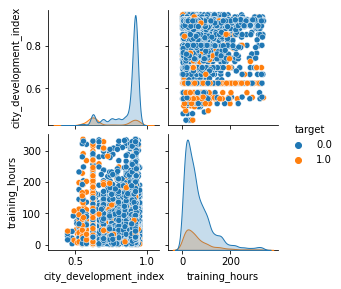

In [21]:
# pair plot
sns.pairplot(data,hue='target',size=2)

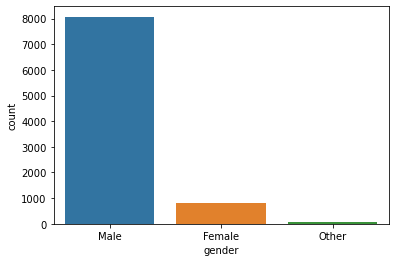

In [22]:
sns.countplot(data['gender'])
plt.show()

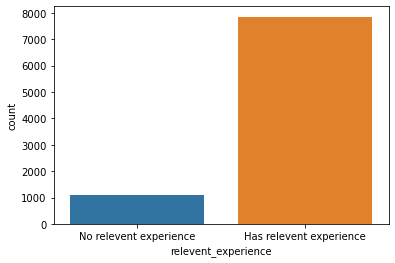

In [23]:
sns.countplot(data['relevent_experience'])
plt.show()

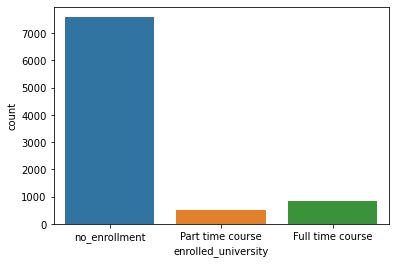

In [24]:
sns.countplot(data['enrolled_university'])
plt.show()

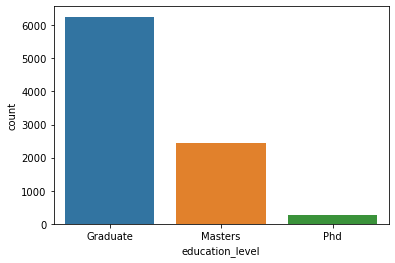

In [25]:
sns.countplot(data['education_level'])
plt.show()

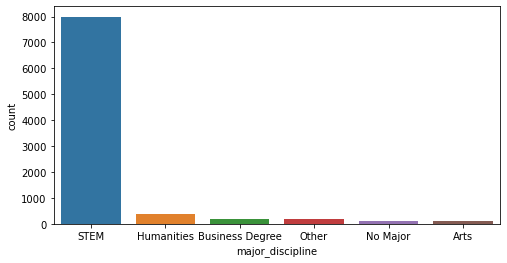

In [26]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data['major_discipline'])
plt.show()

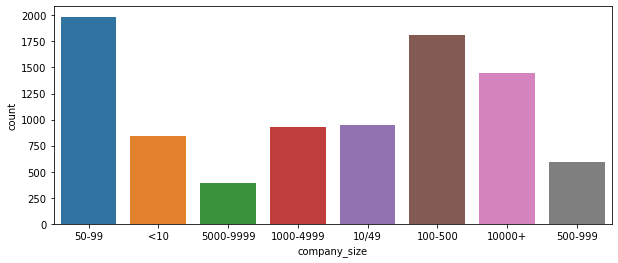

In [27]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(data['company_size'])
plt.show()

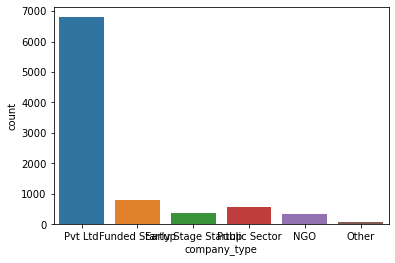

In [28]:
sns.countplot(data['company_type'])
plt.show()

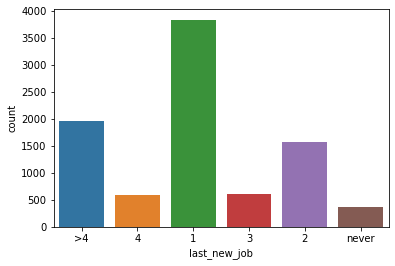

In [29]:
sns.countplot(data['last_new_job'])
plt.show()

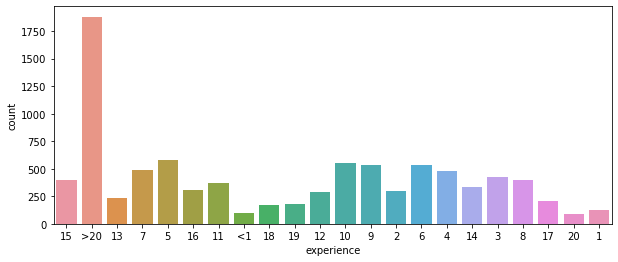

In [30]:

fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(data['experience'])
plt.show()

<AxesSubplot:xlabel='major_discipline', ylabel='target'>

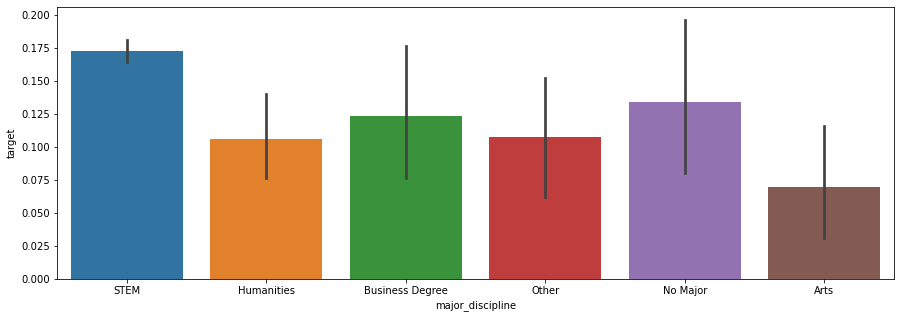

In [31]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data['major_discipline'],data['target'])

<AxesSubplot:xlabel='relevent_experience', ylabel='target'>

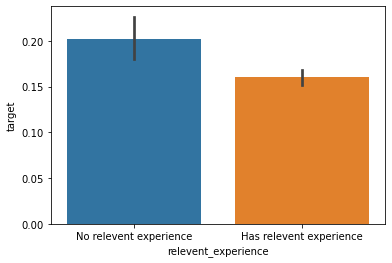

In [32]:
sns.barplot(data['relevent_experience'],data['target'])

<AxesSubplot:xlabel='experience', ylabel='target'>

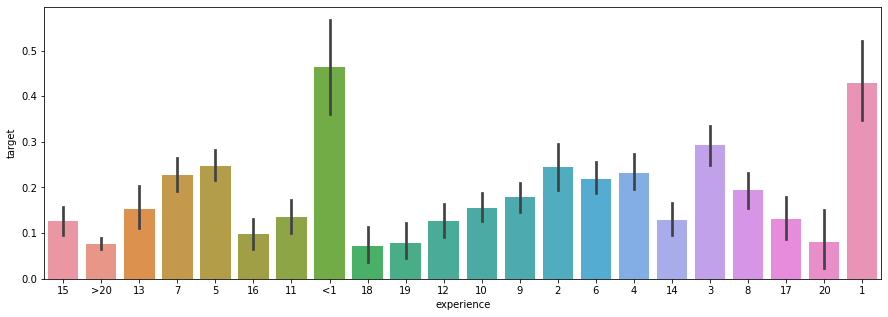

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data['experience'],data['target'])

<AxesSubplot:xlabel='last_new_job', ylabel='target'>

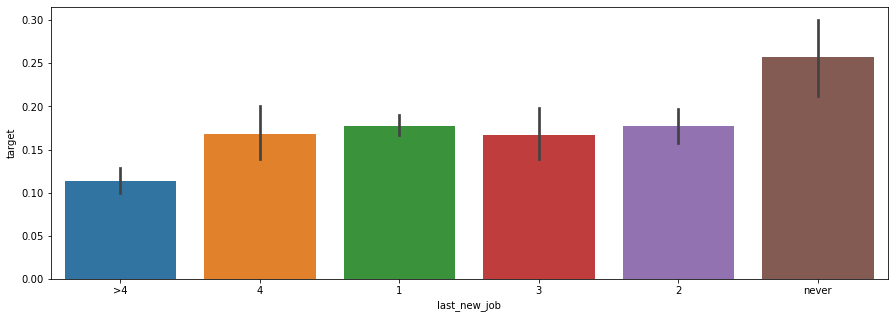

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data['last_new_job'],data['target'])

<AxesSubplot:xlabel='company_size', ylabel='target'>

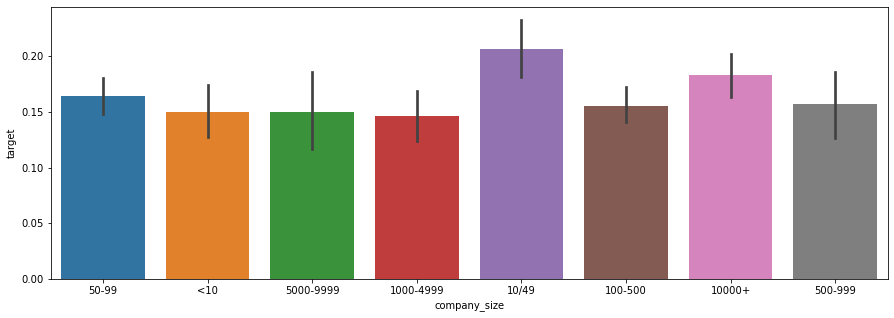

In [35]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data['company_size'],data['target'])

<AxesSubplot:xlabel='company_type', ylabel='target'>

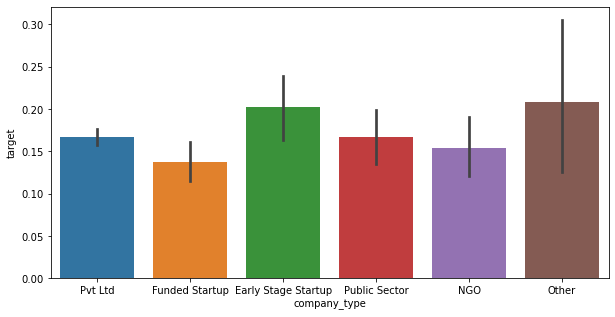

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data['company_type'],data['target'])

<AxesSubplot:>

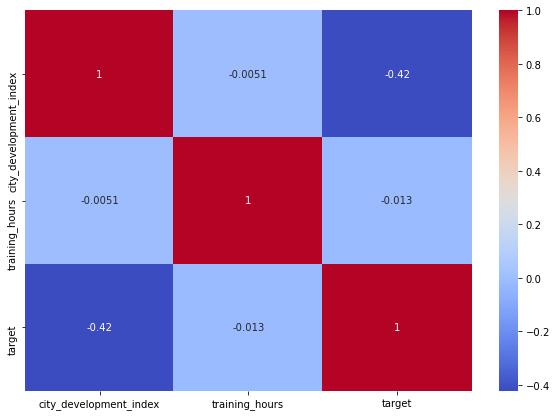

In [37]:
# heat map
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [38]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data:
    if data[x].dtypes=='object':
        data[x] = le.fit_transform(data[x])

In [39]:
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,72,0.776,1,1,2,0,5,6,4,5,4,47,0.0
4,48,0.767,1,0,2,1,5,21,4,1,3,8,0.0
7,78,0.762,1,0,2,0,5,4,7,5,4,18,1.0
8,5,0.920,1,0,2,0,5,17,4,5,0,46,1.0
11,5,0.920,1,0,2,0,5,15,6,5,0,108,0.0


# Data preprocessing

In [40]:
# treain_test_split
x = data.drop(columns=['target'])
y = data['target']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=13)

In [42]:
x_train.shape

(6268, 12)

In [43]:
x_test.shape

(2687, 12)

In [44]:
# LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8262002232973576

In [45]:
y_test

13951    0.0
9115     0.0
13673    0.0
935      0.0
3597     1.0
        ... 
1227     0.0
10649    0.0
12918    1.0
12215    0.0
6361     0.0
Name: target, Length: 2687, dtype: float64

In [46]:
y_predict

array([0., 0., 0., ..., 0., 0., 1.])

In [47]:
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
target,,
0.0,2206,17
1.0,450,14


In [48]:
confusion_matrix(y_test,y_predict)

array([[2206,   17],
       [ 450,   14]])

In [49]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      2223
         1.0       0.45      0.03      0.06       464

    accuracy                           0.83      2687
   macro avg       0.64      0.51      0.48      2687
weighted avg       0.77      0.83      0.76      2687



In [50]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7688872348343878

In [51]:
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
target,,
0.0,1903,320
1.0,301,163


In [52]:
confusion_matrix(y_test,y_predict)

array([[1903,  320],
       [ 301,  163]])

In [53]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      2223
         1.0       0.34      0.35      0.34       464

    accuracy                           0.77      2687
   macro avg       0.60      0.60      0.60      2687
weighted avg       0.77      0.77      0.77      2687



In [54]:
# MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100),random_state=13)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8314104949758094

In [55]:
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
target,,
0.0,2181,42
1.0,411,53


In [56]:
confusion_matrix(y_test,y_predict)

array([[2181,   42],
       [ 411,   53]])

In [57]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91      2223
         1.0       0.56      0.11      0.19       464

    accuracy                           0.83      2687
   macro avg       0.70      0.55      0.55      2687
weighted avg       0.79      0.83      0.78      2687



In [58]:
# RandomForestClassifier 
model = RandomForestClassifier(random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8466691477484183

In [59]:
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
target,,
0.0,2114,109
1.0,303,161


In [60]:
confusion_matrix(y_test,y_predict)

array([[2114,  109],
       [ 303,  161]])

In [61]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2223
         1.0       0.60      0.35      0.44       464

    accuracy                           0.85      2687
   macro avg       0.74      0.65      0.67      2687
weighted avg       0.83      0.85      0.83      2687



In [62]:
# KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 1.])

In [63]:
print("accuracy:",accuracy_score(y_test,y_predict))

accuracy: 0.8295496836620767


In [64]:
confusion_matrix(y_test,y_predict)

array([[2084,  139],
       [ 319,  145]])

In [65]:
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
target,,
0.0,2084,139
1.0,319,145


In [66]:
y_predict = model.predict(x_test)

In [67]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)

[[2084  139]
 [ 319  145]]


<AxesSubplot:>

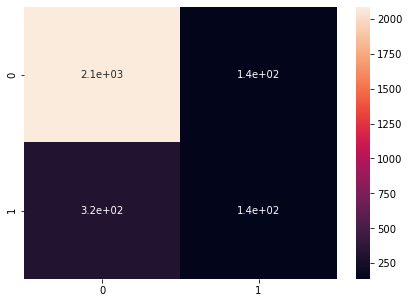

In [68]:
# heat map
plt.figure(figsize = (7,5))
sns.heatmap(matrix,annot=True)

In [69]:
print('accuracy:',accuracy_score(y_test,y_predict))

accuracy: 0.8295496836620767


In [70]:
confusion_matrix(y_test,y_predict)

array([[2084,  139],
       [ 319,  145]])

In [71]:
# XGBClassifier
model =XGBClassifier(learning_rate = 0.1,random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8496464458503907

In [72]:
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
target,,
0.0,2103,120
1.0,284,180


In [73]:
# support victor machine
model = SVC(gamma=0.01,kernel='rbf')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8306661704503163

In [74]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0.0: 2223, 1.0: 464})


col_0,0.0,1.0
target,,
0.0,2119,104
1.0,351,113


In [75]:
# principle componet analysis
pca = PCA()
x = pd.DataFrame(pca.fit_transform(x))

In [76]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-17.601548,32.610854,6.546381,0.889493,2.729139,0.294024,-0.135542,0.004244,-0.293643,0.893067,0.244475,0.042131
1,-56.962987,9.052717,-8.160551,1.243244,-0.200562,3.401936,-0.429065,-0.345039,0.516920,-0.170673,0.067389,0.087715
2,-46.508898,39.043296,8.537797,3.879783,2.868909,0.069198,-0.142635,-0.146292,-0.391753,-0.068804,0.012552,0.047123
3,-19.574308,-34.446945,-3.815243,0.923535,-1.236909,-1.497374,-0.406936,-0.230251,-0.368449,-0.056610,0.060685,-0.045537
4,42.423062,-35.313732,-1.913497,2.902707,-1.118430,-1.660328,-0.401486,-0.245917,-0.357409,-0.052766,0.064883,-0.044148


In [77]:
pca.explained_variance_ratio_

array([7.55818432e-01, 2.31916013e-01, 9.87633218e-03, 8.88228019e-04,
       6.67446107e-04, 4.48415534e-04, 2.08242227e-04, 7.75507359e-05,
       5.70849970e-05, 2.10280106e-05, 1.88151278e-05, 2.41196230e-06])

<AxesSubplot:>

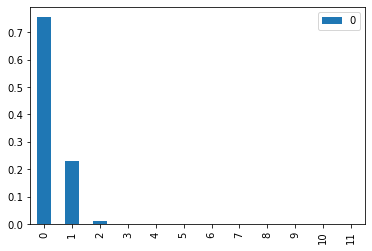

In [78]:
covid_var = pd.DataFrame(pca.explained_variance_ratio_)
covid_var.plot(kind = 'bar')

In [79]:
pca.explained_variance_ratio_[0:-1].sum()

0.9999975880376957

In [80]:
x = x.iloc[:,:-1]
x.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,-17.601548,32.610854,6.546381,0.889493,2.729139,0.294024,-0.135542,0.004244,-0.293643,0.893067,0.244475
1,-56.962987,9.052717,-8.160551,1.243244,-0.200562,3.401936,-0.429065,-0.345039,0.516920,-0.170673,0.067389
2,-46.508898,39.043296,8.537797,3.879783,2.868909,0.069198,-0.142635,-0.146292,-0.391753,-0.068804,0.012552
3,-19.574308,-34.446945,-3.815243,0.923535,-1.236909,-1.497374,-0.406936,-0.230251,-0.368449,-0.056610,0.060685
4,42.423062,-35.313732,-1.913497,2.902707,-1.118430,-1.660328,-0.401486,-0.245917,-0.357409,-0.052766,0.064883


# Conclusion

In [81]:
#Dataframe for models
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "MPL":MLPClassifier(),
          "XGB": XGBClassifier(),
          "SVM": SVC()}
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [82]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8262002232973576,
 'Random Forest': 0.8436918496464458,
 'DecisionTree': 0.7718645329363603,
 'KNN': 0.8295496836620767,
 'MPL': 0.8299218459248232,
 'XGB': 0.8399702270189803,
 'SVM': 0.8273167100855974}

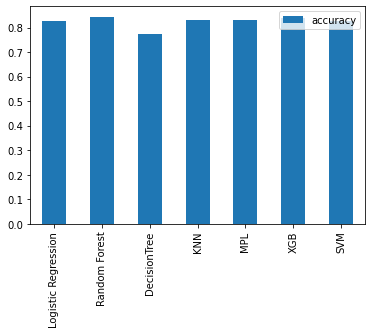

In [83]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();